In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Symbol
import sympy as sym

In [2]:
x = Symbol('x')
y = Symbol('y')
k1 = Symbol('k1')
k1_inv = Symbol('k1_inv')
k2 = Symbol('k2')
k2_inv = Symbol('k2_inv')
k3 = Symbol('k3')
alpha = Symbol('alpha')

f1 = k1 * (1 - x- y) - k1_inv * x - k3 * (1 - x) ** alpha * x * y
f2 = k2 * (1 - x - y) ** 2 - k2_inv * y **2 - k3 * (1 - x) ** alpha * x * y
sol = solve((f1, f2), (k2, y))
k_expr = sol[0][0]
y_expr = sol[0][1]

In [3]:
a11 = sym.diff(f1, x)
a12 = sym.diff(f1, y)
a21 = sym.diff(f2, x)
a22 = sym.diff(f2, y)
k1_expr_fold = solve(((a11 + a22).subs({k2 : k_expr})).subs({y : y_expr}), k1)[0]
k1_expr_neutral = solve(((a11 * a22 - a12 * a21).subs({k2 : k_expr})).subs({y : y_expr}), k1)[0]

In [4]:
alpha_val = 18
k1_val = 0.012
k1_inv_val = 0.01
k2_inv_val = 10e-9
k3_val = 10

One-parameter analysis
====

In [7]:
x_val = np.linspace(0.1, 0.9, 100)
y_val = np.zeros(len(x_val))
k2_val = np.zeros(len(x_val))
k2_val_tmp = np.zeros(len(x_val))
trace = np.zeros(len(x_val))
det = np.zeros(len(x_val))
di = np.zeros(len(x_val))
x_sn, y_sn, k2_sn = [], [], []
x_det, y_det, k2_det = [], [], []
x_di, y_di, k2_di = [], [], []
for i in range(len(x_val)):
    y_val[i] = float(y_expr.subs({k1: k1_val, k1_inv: k1_inv_val, k2: k2_val[i], k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i])})) 
    if y_val[i] < 0:
        break
    # y_val[i] = (k1_val * (1 - x_val[i]) - k1_inv_val * x_val[i]) / (k1_val + k3_val * (1 - x_val[i]) ** alpha_val * x_val[i])
    # k2_val[i] = float(k_expr.subs({k1: k1_val, k1_inv: k1_inv_val, k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i]), y: float(y_val[i])}))
    k2_val[i] = (k2_inv_val * y_val[i] **2 + k3_val * (1 - x_val[i])**alpha_val * x_val[i] * y_val[i]) / (1 - x_val[i] - y_val[i]) ** 2
    
    a11_val = float(a11.subs({k1: k1_val, k1_inv: k1_inv_val, k2: k2_val[i], k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i]), y: float(y_val[i])}))
    a22_val = float(a22.subs({k1: k1_val, k1_inv: k1_inv_val, k2: k2_val[i], k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i]), y: float(y_val[i])}))
    a12_val = float(a12.subs({k1: k1_val, k1_inv: k1_inv_val, k2: k2_val[i], k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i]), y: float(y_val[i])}))
    a21_val = float(a21.subs({k1: k1_val, k1_inv: k1_inv_val, k2: k2_val[i], k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i]), y: float(y_val[i])}))
    trace[i] = a11_val + a22_val
    det[i] = a11_val * a22_val - a12_val * a21_val
    di[i] = trace[i] ** 2 - 4 * det[i]
    if i != 0:
        if trace[i] * trace[i - 1] <= 0:
            x_sn.append(x_val[i])
            y_sn.append(y_val[i])
            k2_sn.append(k2_val[i])
        if det[i] * det[i - 1] <= 0:
            x_det.append(x_val[i])
            y_det.append(y_val[i])
            k2_det.append(k2_val[i])
        if di[i] * di[i - 1] <= 0:
            x_di.append(x_val[i])
            y_di.append(y_val[i])
            k2_di.append(k2_val[i])


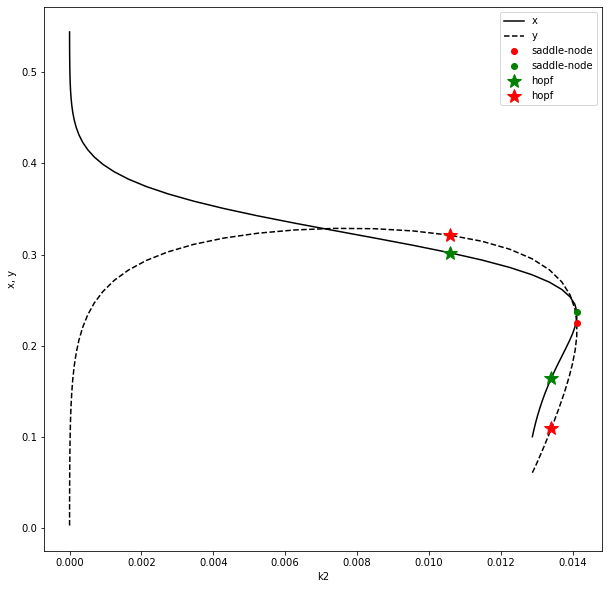

In [12]:
fig = plt.figure(figsize=(10, 10))
mask = k2_val != 0
plt.plot(k2_val[mask], x_val[mask], color='black', label='x')
plt.plot(k2_val[mask], y_val[mask], color='black', linestyle='--', label='y')
# plt.plot(k2_sn, x_sn, 'go')
plt.plot(k2_det, y_det, 'go', color='red', label='saddle-node')
plt.plot(k2_det, x_det, 'go', color='green', label='saddle-node')


plt.plot(k2_sn,  x_sn, '*', markersize=15, color='green', label='hopf')
plt.plot(k2_sn,  y_sn, '*', markersize=15, color='red', label='hopf')
plt.xlabel('k2')
plt.ylabel('x, y')
plt.legend()
plt.savefig('tmp.png')
#plt.plot([0, 0], [1, 0])
#plt.xlim(left=4.0)
# plt.ylim(0, 1)
# plt.xlim(left=0.001)

Two-parameter analysis
===

In [6]:
x_val = np.linspace(0.1, 0.9, 100)
y_val = np.zeros(len(x_val))
k2_val_fold = np.zeros(len(x_val))
k1_val_fold = np.zeros(len(x_val))
for i in range(len(x_val)):
    try:
        k1_val_fold[i] = float(k1_expr_fold.subs({k1_inv: k1_inv_val, k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i])}))
        y_val[i] = float(y_expr.subs({k1: k1_val_fold[i], k1_inv: k1_inv_val, k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i])}))
        k2_val_fold[i] = float(k_expr.subs({k1: k1_val_fold[i], k1_inv: k1_inv_val, k2: k2_val_fold[i], k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i]), y: float(y_val[i])}))
    except TypeError:
        break
    

In [7]:
x_val = np.linspace(0.1, 0.9, 100)
y_val = np.zeros(len(x_val))
k2_val_neutral = np.zeros(len(x_val))
k1_val_neutral = np.zeros(len(x_val))
for i in range(len(x_val)):
    try:
        k1_val_neutral[i] = (float(k1_expr_neutral.subs({k1_inv: k1_inv_val, k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i])})))
        y_val[i] = float(y_expr.subs({k1: k1_val_neutral[i], k1_inv: k1_inv_val, k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i])}))
        k2_val_neutral[i] = (float(k_expr.subs({k1: k1_val_neutral[i], k1_inv: k1_inv_val, k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i]), y: float(y_val[i])})))
    except TypeError:
        print(i)
        break
   


Text(0, 0.5, 'k2')

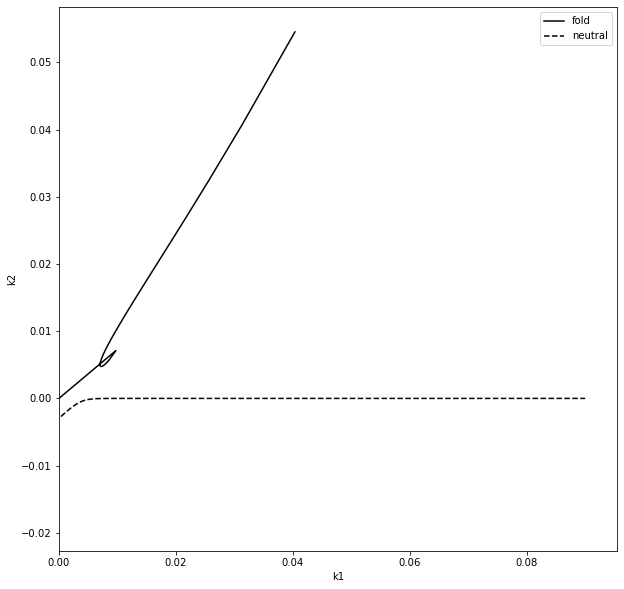

In [8]:
fig = plt.figure(figsize=(10,10))
plt.plot(k1_val_fold, k2_val_fold, color='black', label='fold')

plt.plot(k1_val_neutral, k2_val_neutral, color='black', linestyle='--', label='neutral')
plt.legend()
plt.xlim(left=0.0)
plt.xlabel('k1')
plt.ylabel('k2')
#plt.ylim([-0.2, 0.5])
#plt.plot(k1_val_fold, y_val, color='black', linestyle='--')

Check params
====


In [1]:
counter = 0
# for alpha_val in [10, 15, 18, 20, 25]:
#     for k1_inv_val in [0.01, 0.001, 0.1, 0.05, 0.03]:
for k2_inv_val in [10 ** (-9), 0.00001, 0.000001, 0.0000001]:
    for k2_val in [0.012, 0.1, 0.05, 0.03, 0.001, 0.006]:
        for k3_val in [10, 15, 20, 30, 3, 100]:
            x_val = np.linspace(0.1, 0.9, 100)
            y_val = np.zeros(len(x_val))
            k2_val_fold = np.zeros(len(x_val))
            k1_val_fold = np.zeros(len(x_val))
            for i in range(len(x_val)):
                try:
                    k1_val_fold[i] = float(k1_expr_fold.subs({k1_inv: k1_inv_val, k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i])}))
                    y_val[i] = float(y_expr.subs({k1: k1_val_fold[i], k1_inv: k1_inv_val, k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i])}))
                    k2_val_fold[i] = float(k_expr.subs({k1: k1_val_fold[i], k1_inv: k1_inv_val, k2: k2_val_fold[i], k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i]), y: float(y_val[i])}))
                except TypeError: # complex number
                    break

            x_val = np.linspace(0.1, 0.9, 100)
            y_val = np.zeros(len(x_val))
            k2_val_neutral = np.zeros(len(x_val))
            k1_val_neutral = np.zeros(len(x_val))
            for i in range(len(x_val)):
                try:
                    k1_val_neutral[i] = (float(k1_expr_neutral.subs({k1_inv: k1_inv_val, k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i])})))
                    y_val[i] = float(y_expr.subs({k1: k1_val_neutral[i], k1_inv: k1_inv_val, k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i])}))
                    k2_val_neutral[i] = (float(k_expr.subs({k1: k1_val_neutral[i], k1_inv: k1_inv_val, k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i]), y: float(y_val[i])})))
                except TypeError:# complex number
                    break

            fig = plt.figure(figsize=(10,10))
            plt.plot(k1_val_fold, k2_val_fold, color='black', label='fold')

            plt.plot(k1_val_neutral, k2_val_neutral, color='black', linestyle='--', label='neutral')
            plt.legend()
            plt.xlim(left=0.0)
            plt.title('alpha:{},k1_inv:{},k2_inv:{},k2:{},k3:{}'.format(alpha_val, k1_inv_val, k2_inv_val, k2_val, k3_val))
            plt.savefig('figures/{}.png'.format(counter))
            counter += 1

NameError: name 'np' is not defined

Numrecial solutin
===

In [130]:
from scipy.integrate import odeint

In [131]:
alpha_val = 18
k1_val = 0.012
k1_inv_val = 0.01
k2_inv_val = 10e-9
k3_val = 10
k2_val = 0.012

def model(z,t):
    x, y = z[0], z[1]
    dxdt = k1_val * (1 - x - y) - k1_inv_val * x - k3_val * x * y * (1 - x) ** alpha_val
    dydt = k2_val * (1 - x - y) ** 2 - k2_inv_val * y ** 2 - k3_val * x * y * (1 - x) ** alpha_val
    dzdt = [dxdt,dydt]
    return dzdt

In [132]:
inital = [0.2, 0.3]
dt = 0.1
t_max = 2500
t = np.linspace(0, t_max, int(t_max / dt))
sol = odeint(model, inital, t)


Text(0.5, 0, 't')

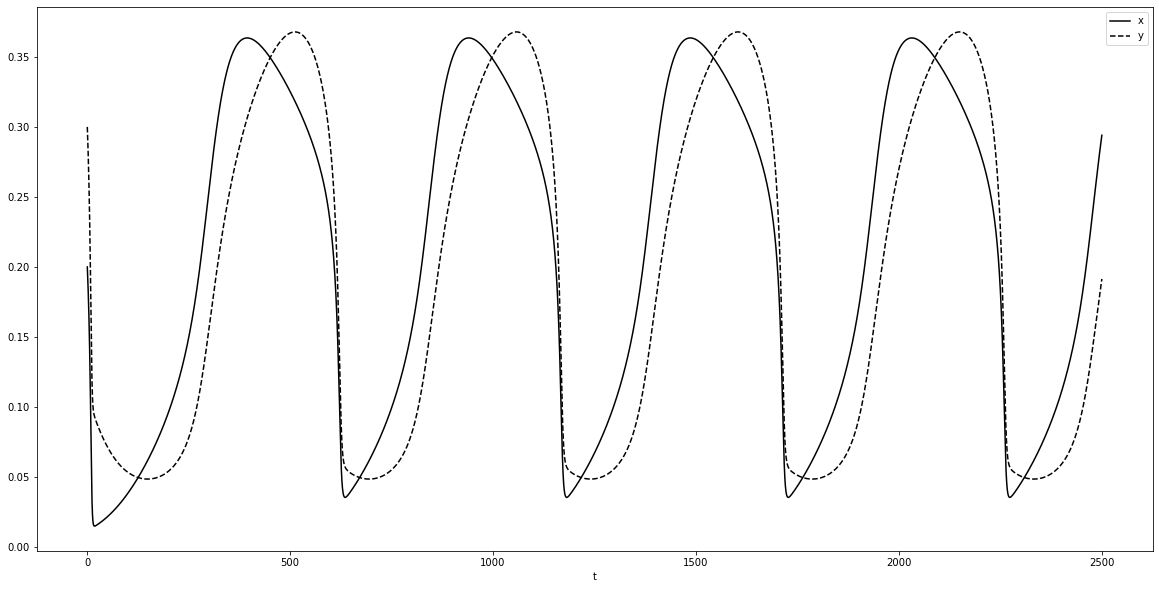

In [135]:
fig = plt.figure(figsize=(20, 10))
plt.plot(t, sol[:, 0], color='black', label='x')
plt.plot(t, sol[:, 1], color='black', linestyle='--', label='y')
plt.legend()
plt.xlabel('t')

In [136]:
additional_solutions = []
additional_initial = [(0, 0.5), (0.32, 0.1)]
for inital in additional_initial:
    sol_add = odeint(model, inital, t)
    additional_solutions.append(sol_add)


In [137]:
sol_end = odeint(model, [sol[len(t) - 1, 0], sol[len(t) - 1, 1]], t)

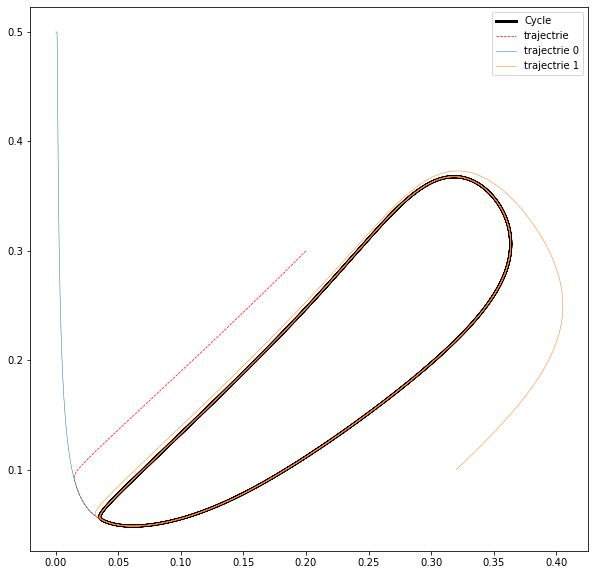

In [138]:
fig = plt.figure(figsize=(10, 10))
plt.plot(sol_end[:, 0], sol_end[:, 1], linewidth = 3, color='black', label='Cycle')
plt.plot(sol[:, 0], sol[:, 1], color='red',  linewidth = 0.7, linestyle='--', label='trajectrie')
for i, sol_add in enumerate(additional_solutions):
    plt.plot(sol_add[:, 0], sol_add[:, 1], linewidth=0.5, label='trajectrie {}'.format(i))
plt.legend()